## 7.1 Introdução a árvores de decisão

- Inteligência artificial (IA se refere à simulação da inteligência humana em máquinas programadas para pensar como humanos e imitar suas ações)
    
    - Machine Learning (Técnica dentro de inteligência artificial, se refere ao conceito de que progrmas de computador podem aprender automaticamente e se adaptar a novos dados sem serem assistidos por humanos)
    
        -  Modelo Supervisionado (É uma abordagem de aprendizado de máquina definida pelo uso de conjuntos de dados com rótulos (target). Esses conjuntos de dados são projetados para treinar algoritimos para classificar dados ou prever resultados)
            
            - Classificação (São usados quando a variável resposta (target) é discreta, categorizado, com classes, exemplos: Classificar um email em spam ou não spam, classificar um cliente em bom ou mau pagador, classificar a qualidade de uma peça entre baixa, média, alta etc.)

            - Regressão (São usados quando a variável resposta (target) é um valor numérico continuo, exemplos: Previsão de vendas, previsão de receita, previsão de temperatura, preço de aluguel etc.)
        
        -  Modelo Não Supervisionado (É uma abordagem de aprendizado de maquina que usa algoritimos de aprendizado de máquina para analisar e agrupar conjuntos de dados não rotulados. Esses algoritimos descobrem padrões ocultos nos dados)


- Árvore de decisão (DT) é um método de aprendizado que usa regras de decisão simples inferidas a partir dos dados (Se aplica tanto no modelo de Classificação quanto no de Regressão)

## 7.2 Carregando e tratando os dados

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Carregando o dataframe
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Explorando dados e removendo dados duplicados

In [3]:
# titanic.dtypes
# titanic.isna().sum()

# informações sobre o dataframe contagem de linhas, contagem de variáveis não nulas tipos
# talvez uma melhor forma que o dtypes
titanic.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
titanic.shape

(891, 15)

In [5]:
t = titanic.drop_duplicates()
t.shape

(784, 15)

In [6]:
# t.tail()
t.reset_index(drop=True, inplace=True)

In [7]:
t.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
779,0,3,female,39.0,0,5,29.125,Q,Third,woman,False,NaN,Queenstown,no,False
780,1,1,female,19.0,0,0,30.000,S,First,woman,False,B,Southampton,yes,True
781,0,3,female,NaN,1,2,23.450,S,Third,woman,False,NaN,Southampton,no,False
782,1,1,male,26.0,0,0,30.000,C,First,man,True,C,Cherbourg,yes,True
783,0,3,male,32.0,0,0,7.750,Q,Third,man,True,NaN,Queenstown,no,True


### Identificando e tratando dados ausentes

In [8]:
# scikit-learn não suporta dados ausentes
t.isna().sum()

survived         0
pclass           0
sex              0
age            106
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           582
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
# percentual de dados ausentes
pctg = (t.isnull().sum() / len(t)) * 100
pctg

survived        0.000000
pclass          0.000000
sex             0.000000
age            13.520408
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.255102
class           0.000000
who             0.000000
adult_male      0.000000
deck           74.234694
embark_town     0.255102
alive           0.000000
alone           0.000000
dtype: float64

In [10]:
t.shape

(784, 15)

In [11]:
# dropando colunas que contem dados NA
t_nna = t.dropna(axis=1)
t_nna.head()

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True


In [12]:
t_nna.shape

(784, 11)

In [13]:
t_nna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    784 non-null    int64   
 1   pclass      784 non-null    int64   
 2   sex         784 non-null    object  
 3   sibsp       784 non-null    int64   
 4   parch       784 non-null    int64   
 5   fare        784 non-null    float64 
 6   class       784 non-null    category
 7   who         784 non-null    object  
 8   adult_male  784 non-null    bool    
 9   alive       784 non-null    object  
 10  alone       784 non-null    bool    
dtypes: bool(2), category(1), float64(1), int64(4), object(3)
memory usage: 51.6+ KB


In [14]:
# comparando se seriam as mesmas variáveis
t_nna.survived.value_counts()

0    461
1    323
Name: survived, dtype: int64

In [15]:
t_nna.alive.value_counts()

no     461
yes    323
Name: alive, dtype: int64

In [16]:
# agrupando para verificar se seriam exatamente os mesmo valores nas duas colunas 
# 'alive', 'survived'
t_nna[['alive', 'survived', 'sibsp']].groupby(['alive', 'survived']).count()

,,sibsp
alive,survived,
no,0,461
yes,1,323


In [17]:
# dropando variáveis iguais
t_nna2 = t_nna.drop('alive', axis=1)

In [18]:
# agrupando para verificar se seriam exatamente os mesmo valores nas duas colunas 
# 'pclass', 'class'
t_nna[['pclass', 'class', 'sibsp']].groupby(['pclass', 'class']).count()

sibsp
pclass class        
1      First     214
       Second      0
       Third       0
2      First       0
       Second    165
       Third       0
3      First       0
       Second      0
       Third     405

In [19]:
t_nna2 = t_nna2.drop('class', axis=1)

In [20]:
t_nna2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    784 non-null    int64  
 1   pclass      784 non-null    int64  
 2   sex         784 non-null    object 
 3   sibsp       784 non-null    int64  
 4   parch       784 non-null    int64  
 5   fare        784 non-null    float64
 6   who         784 non-null    object 
 7   adult_male  784 non-null    bool   
 8   alone       784 non-null    bool   
dtypes: bool(2), float64(1), int64(4), object(2)
memory usage: 44.5+ KB


In [21]:
# transformando variáveis objeto em [ flag ]
t_enc = pd.get_dummies(t_nna2, columns=['who'], drop_first=True)
t_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    784 non-null    int64  
 1   pclass      784 non-null    int64  
 2   sex         784 non-null    object 
 3   sibsp       784 non-null    int64  
 4   parch       784 non-null    int64  
 5   fare        784 non-null    float64
 6   adult_male  784 non-null    bool   
 7   alone       784 non-null    bool   
 8   who_man     784 non-null    uint8  
 9   who_woman   784 non-null    uint8  
dtypes: bool(2), float64(1), int64(4), object(1), uint8(2)
memory usage: 39.9+ KB


In [22]:
t_enc.head(10)

,survived,pclass,sex,sibsp,parch,fare,adult_male,alone,who_man,who_woman
0,0,3,male,1,0,7.2500,True,False,1,0
1,1,1,female,1,0,71.2833,False,False,0,1
2,1,3,female,0,0,7.9250,False,True,0,1
3,1,1,female,1,0,53.1000,False,False,0,1
4,0,3,male,0,0,8.0500,True,True,1,0
5,0,3,male,0,0,8.4583,True,True,1,0
6,0,1,male,0,0,51.8625,True,True,1,0
7,0,3,male,3,1,21.0750,False,False,0,0
8,1,3,female,0,2,11.1333,False,False,0,1
9,1,2,female,1,0,30.0708,False,False,0,0


In [23]:
# tratando o sexo com o método map
t_enc.sex = t_enc.sex.map({'female': 1, 'male': 0})
t_enc.head(10)

,survived,pclass,sex,sibsp,parch,fare,adult_male,alone,who_man,who_woman
0,0,3,0,1,0,7.2500,True,False,1,0
1,1,1,1,1,0,71.2833,False,False,0,1
2,1,3,1,0,0,7.9250,False,True,0,1
3,1,1,1,1,0,53.1000,False,False,0,1
4,0,3,0,0,0,8.0500,True,True,1,0
5,0,3,0,0,0,8.4583,True,True,1,0
6,0,1,0,0,0,51.8625,True,True,1,0
7,0,3,0,3,1,21.0750,False,False,0,0
8,1,3,1,0,2,11.1333,False,False,0,1
9,1,2,1,1,0,30.0708,False,False,0,0


In [24]:
t_enc['sex'].unique()
t_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    784 non-null    int64  
 1   pclass      784 non-null    int64  
 2   sex         784 non-null    int64  
 3   sibsp       784 non-null    int64  
 4   parch       784 non-null    int64  
 5   fare        784 non-null    float64
 6   adult_male  784 non-null    bool   
 7   alone       784 non-null    bool   
 8   who_man     784 non-null    uint8  
 9   who_woman   784 non-null    uint8  
dtypes: bool(2), float64(1), int64(5), uint8(2)
memory usage: 39.9 KB


In [25]:
# transformando variáveis booleanas em int
t_enc.adult_male = t_enc.adult_male.astype(int)
t_enc.alone = t_enc.alone.astype(int)
t_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    784 non-null    int64  
 1   pclass      784 non-null    int64  
 2   sex         784 non-null    int64  
 3   sibsp       784 non-null    int64  
 4   parch       784 non-null    int64  
 5   fare        784 non-null    float64
 6   adult_male  784 non-null    int64  
 7   alone       784 non-null    int64  
 8   who_man     784 non-null    uint8  
 9   who_woman   784 non-null    uint8  
dtypes: float64(1), int64(7), uint8(2)
memory usage: 50.7 KB


In [26]:
t_enc.head()

,survived,pclass,sex,sibsp,parch,fare,adult_male,alone,who_man,who_woman
0,0,3,0,1,0,7.2500,1,0,1,0
1,1,1,1,1,0,71.2833,0,0,0,1
2,1,3,1,0,0,7.9250,0,1,0,1
3,1,1,1,1,0,53.1000,0,0,0,1
4,0,3,0,0,0,8.0500,1,1,1,0


### Dividindo o conjunto de dados para começar o treinamento do algorítimo

In [27]:
# selecionando somente a coluna de sobreviventes
y = t_enc.survived
y

0      0
1      1
2      1
3      1
4      0
      ..
779    0
780    1
781    0
782    1
783    0
Name: survived, Length: 784, dtype: int64

In [28]:
# dropando a coluna de sobreviventes
x = t_enc.drop('survived', axis=1)

In [29]:
x

,pclass,sex,sibsp,parch,fare,adult_male,alone,who_man,who_woman
0,3,0,1,0,7.2500,1,0,1,0
1,1,1,1,0,71.2833,0,0,0,1
2,3,1,0,0,7.9250,0,1,0,1
3,1,1,1,0,53.1000,0,0,0,1
4,3,0,0,0,8.0500,1,1,1,0
...,...,...,...,...,...,...,...,...,...
779,3,1,0,5,29.1250,0,0,0,1
780,1,1,0,0,30.0000,0,1,0,1
781,3,1,1,2,23.4500,0,0,0,1
782,1,0,0,0,30.0000,1,1,1,0


## 7.3 Melhor valor e variável para quebra

In [30]:
clf = DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

In [31]:
x.head()

,pclass,sex,sibsp,parch,fare,adult_male,alone,who_man,who_woman
0,3,0,1,0,7.2500,1,0,1,0
1,1,1,1,0,71.2833,0,0,0,1
2,3,1,0,0,7.9250,0,1,0,1
3,1,1,1,0,53.1000,0,0,0,1
4,3,0,0,0,8.0500,1,1,1,0


In [32]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

### Construindo arvores com apena uma variável (arvore com apenas uma coluna)

In [33]:
x[['adult_male']]

,adult_male
0,1
1,0
2,0
3,0
4,1
...,...
779,0
780,0
781,0
782,1


In [34]:
c = 'adult_male'
clf = clf.fit(x[[c]], y)
clf

DecisionTreeClassifier(random_state=100)

[Text(0.5, 0.75, 'adult_male <= 0.5\ngini = 0.485\nsamples = 784\nvalue = [461, 323]\nclass = Died'),
 Text(0.25, 0.25, 'gini = 0.408\nsamples = 333\nvalue = [95, 238]\nclass = Survived'),
 Text(0.75, 0.25, 'gini = 0.306\nsamples = 451\nvalue = [366, 85]\nclass = Died')]

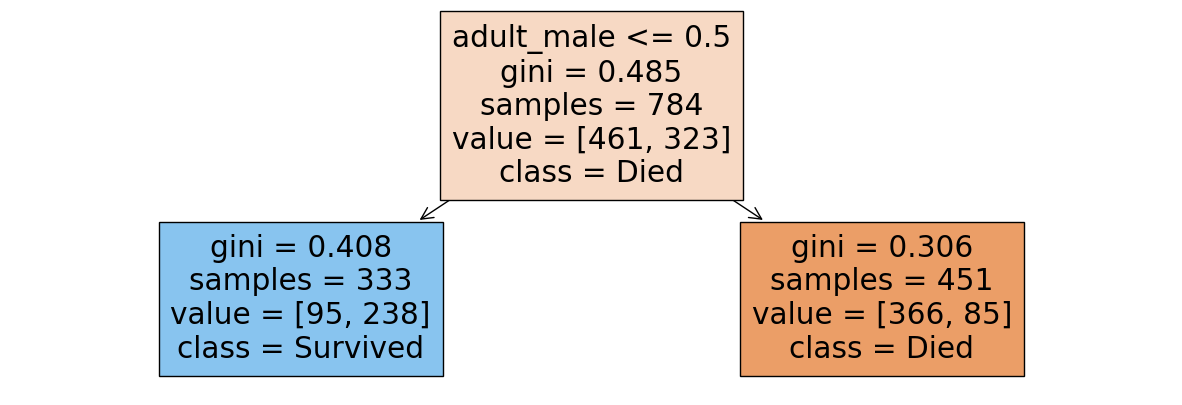

In [35]:
plt.figure(figsize=(15, 5))
plot_tree(
    clf,
    filled=True,
    class_names=['Died', 'Survived'],
    feature_names=[c]
)

### Fórmula de cálculo do Gini
- Variável que mede a pureza da árvore

In [36]:
def gini_calc(py, pn):
    total = py + pn
    return 1 - (py / (total)) ** 2 - (pn / (total)) ** 2 

In [37]:
g = gini_calc(323, 461)
print('Gini raiz é: {}'.format(round(g, 3)))

Gini raiz é: 0.485


In [38]:
g = gini_calc(238, 95)
print('Gini Survived é: {}'.format(round(g, 3)))

Gini Survived é: 0.408


In [39]:
g = gini_calc(85, 366)
print('Gini Died é: {}'.format(round(g, 3)))

Gini Died é: 0.306


In [40]:
# classe do passageiro
x['pclass']

0      3
1      1
2      3
3      1
4      3
      ..
779    3
780    1
781    3
782    1
783    3
Name: pclass, Length: 784, dtype: int64

In [41]:
c = 'pclass'
clf = clf.fit(x[[c]], y)
clf

DecisionTreeClassifier(random_state=100)

[Text(0.6, 0.8333333333333334, 'pclass <= 2.5\ngini = 0.485\nsamples = 784\nvalue = [461, 323]\nclass = Died'),
 Text(0.4, 0.5, 'pclass <= 1.5\ngini = 0.488\nsamples = 379\nvalue = [160, 219]\nclass = Survived'),
 Text(0.2, 0.16666666666666666, 'gini = 0.466\nsamples = 214\nvalue = [79, 135]\nclass = Survived'),
 Text(0.6, 0.16666666666666666, 'gini = 0.5\nsamples = 165\nvalue = [81, 84]\nclass = Survived'),
 Text(0.8, 0.5, 'gini = 0.382\nsamples = 405\nvalue = [301, 104]\nclass = Died')]

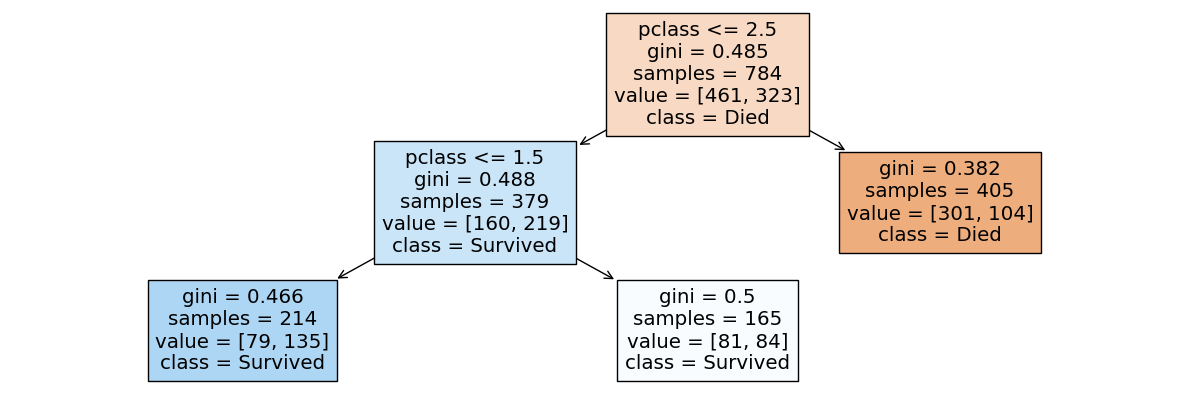

In [42]:
plt.figure(figsize=(15, 5))
plot_tree(
    clf,
    filled=True,
    class_names=['Died', 'Survived'],
    feature_names=[c]
)

### Para decidir a variável raiz soma o gini final e compara com a soma do outro gini final o que for menor é o melhor porque é o a árvore mais pura

In [43]:
x['adult_male'].unique()

array([1, 0])

In [44]:
c = ['pclass', 'adult_male']
clf = clf.fit(x[c], y)
clf

DecisionTreeClassifier(random_state=100)

[Text(0.5, 0.875, 'adult_male <= 0.5\ngini = 0.485\nsamples = 784\nvalue = [461, 323]\nclass = Died'),
 Text(0.3, 0.625, 'pclass <= 2.5\ngini = 0.408\nsamples = 333\nvalue = [95, 238]\nclass = Survived'),
 Text(0.2, 0.375, 'pclass <= 1.5\ngini = 0.096\nsamples = 178\nvalue = [9, 169]\nclass = Survived'),
 Text(0.1, 0.125, 'gini = 0.061\nsamples = 96\nvalue = [3, 93]\nclass = Survived'),
 Text(0.3, 0.125, 'gini = 0.136\nsamples = 82\nvalue = [6, 76]\nclass = Survived'),
 Text(0.4, 0.375, 'gini = 0.494\nsamples = 155\nvalue = [86, 69]\nclass = Died'),
 Text(0.7, 0.625, 'pclass <= 1.5\ngini = 0.306\nsamples = 451\nvalue = [366, 85]\nclass = Died'),
 Text(0.6, 0.375, 'gini = 0.458\nsamples = 118\nvalue = [76, 42]\nclass = Died'),
 Text(0.8, 0.375, 'pclass <= 2.5\ngini = 0.225\nsamples = 333\nvalue = [290, 43]\nclass = Died'),
 Text(0.7, 0.125, 'gini = 0.174\nsamples = 83\nvalue = [75, 8]\nclass = Died'),
 Text(0.9, 0.125, 'gini = 0.241\nsamples = 250\nvalue = [215, 35]\nclass = Died')]

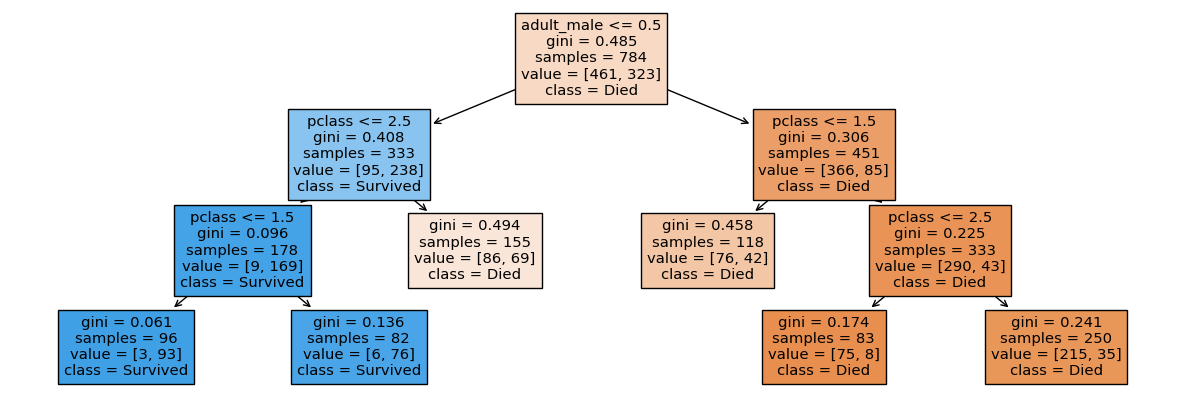

In [45]:
plt.figure(figsize=(15, 5))
plot_tree(
    clf,
    filled=True,
    class_names=['Died', 'Survived'],
    feature_names=c
)

# 7.4 Quebra de variável contínua

- Gini usar para ponto de quebra

- 1. Ordena os dados
    

In [46]:
# t_nna2[['fare']]
t_enc[['survived', 'fare']].sort_values(by='fare').describe()

,survived,fare
count,784.000000,784.000000
mean,0.411990,34.711740
std,0.492507,52.160151
min,0.000000,0.000000
25%,0.000000,8.050000
50%,0.000000,15.900000
75%,1.000000,34.109350
max,1.000000,512.329200


- 2. Achando o ponto de corte

In [47]:
t_enc[t_enc['fare'] < 50]['survived'].value_counts()

0    414
1    217
Name: survived, dtype: int64

In [48]:
t_enc[t_enc['fare'] < 40]['survived'].value_counts()

0    403
1    213
Name: survived, dtype: int64

In [49]:
t_enc[t_enc['fare'] < 30]['survived'].value_counts()

0    367
1    185
Name: survived, dtype: int64

- 3. Definindo o ponto de corte

In [50]:
v35 = t_enc[t_enc['fare'] < 35]['survived'].value_counts()
v35

0    390
1    203
Name: survived, dtype: int64

In [51]:
v45 = t_enc[t_enc['fare'] < 45]['survived'].value_counts()
v45

0    406
1    215
Name: survived, dtype: int64

In [52]:
# calculo do gin de < 35
g35 = gini_calc(203, 390)

# total de vivos dividido pelo total de pessoas multiplicado pelo Gini desse ramo
calc_cut_35_1 = (203 / v35.sum()) * g35
calc_cut_35_0 = (390 / v35.sum()) * g35

# soma os dois calculos
print(calc_cut_35_1 + calc_cut_35_0, g35, v35.sum())

0.45027854479893303 0.45027854479893303 593


In [53]:
# calculo do gin de < 45
g45 = gini_calc(215, 406)

# total de vivos dividido pelo total de pessoas multiplicado pelo Gini desse ramo
calc_cut_45_1 = (215 / v45.sum()) * g45
calc_cut_45_0 = (406 / v45.sum()) * g45

# soma os dois calculos
print(calc_cut_45_1 + calc_cut_45_0, g45, v45.sum())

0.4527008279721295 0.45270082797212957 621


# 7.5 Overfitting

- Um modelo de função bom é aquele que explica bem os dados, um modelo Balanceado sem ser Underfiting ou Overfiting
- O Objetivo é ter um modelo mais generalista, sem ser muito específico para o conjunto de dados que temos em mão para poder classificar a chegada de um dado novo

### Overfitting Exemplo

<img width='800px' src='datalake/Screenshot 2023-01-21 at 10.40.10.png'>

### Treino e Teste

- Normalmente se utiliza 70% para treino e 30% do conjunto de dados para teste

### Treino e Teste

<img width='800px' src='datalake/Screenshot 2023-01-21 at 10.46.53.png'>

### Treinando o Modelo

<img width='800px' src='datalake/Screenshot 2023-01-21 at 10.53.16.png'>
